In [87]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

In [88]:
insurance_ds = '../data_sets/insurance_ds.csv'

insurance_data = pd.read_csv(insurance_ds)

In [89]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [90]:
insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [91]:
insurance_data.shape

(1338, 7)

In [92]:
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Text(0.5, 1.0, 'Age Distribution')

<Figure size 1000x1000 with 0 Axes>

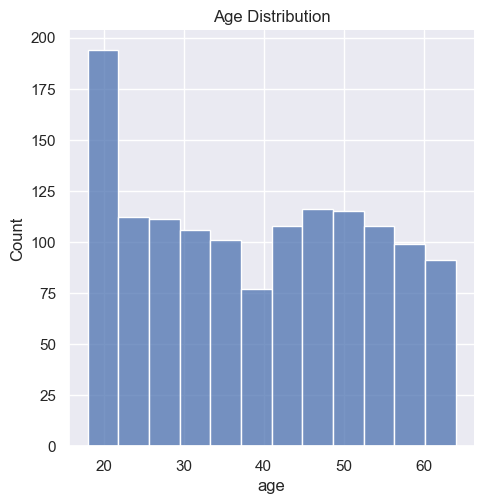

In [93]:
sns.set_theme()
plt.figure(figsize=(10, 10))
sns.displot(
    insurance_data['age']
)

plt.title("Age Distribution")

<Axes: xlabel='sex', ylabel='count'>

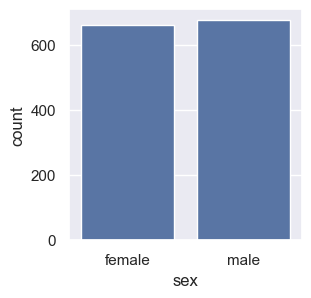

In [94]:
plt.figure(figsize=(3, 3))

sns.countplot(
    x='sex',
    data=insurance_data
)

Text(0.5, 1.0, 'Age Distribution')

<Figure size 1000x1000 with 0 Axes>

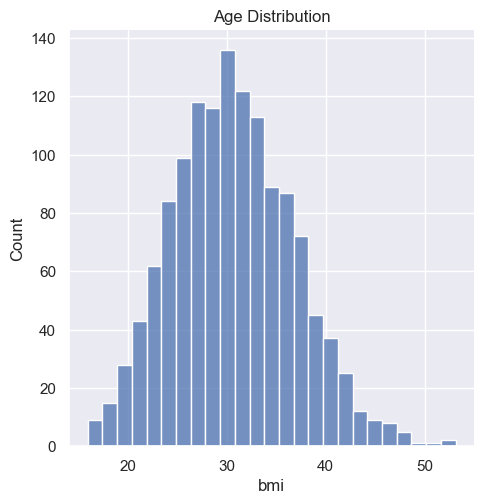

In [95]:
sns.set_theme()
plt.figure(figsize=(10, 10))
sns.displot(
    insurance_data['bmi']
)

plt.title("Age Distribution")

In [96]:
insurance_data.replace(
    {
        "sex": {'male':0, "female": 1},
        "smoker":{"yes":0, "no":1},
        "region":{"southeast":0, 'southwest': 1, "northwest": 2, "northeast":3 }
    }, 
    inplace=True
)

C:\Users\rajun\AppData\Local\Temp\ipykernel_16168\3345018217.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_data.replace(


In [97]:
insurance_data['region'].value_counts()

region
0    364
1    325
2    325
3    324
Name: count, dtype: int64

In [98]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,2,21984.47061
4,32,0,28.880,0,1,2,3866.85520


In [99]:
X = insurance_data.drop(columns='charges', axis=1)

Y =  insurance_data['charges']

In [100]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X,
    Y,
    train_size=0.8,
    random_state=2
)

In [101]:
model = LinearRegression()

In [102]:
model.fit(X_train, Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [103]:


X_train_prediction = model.predict(X_train)

error_score = metrics.r2_score(Y_train, X_train_prediction)

error_score

0.7518195459072954

In [104]:


X_test_prediction = model.predict(X_test)

error_score = metrics.r2_score(Y_test, X_test_prediction)

error_score

0.7454471618659975

In [107]:
input_data = (
21,1,21.85,1,0,3,

)

input_data_array = np.asarray(input_data).reshape(1, -1)

prediction = model.predict(input_data_array)

prediction[0]

e:\learning\ML\projects\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(25197.166093939617)